<a href="https://colab.research.google.com/github/RashmiKamde/UberAnalysis-Python/blob/main/Uber_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
data = files.upload()

Saving UberDataset.xlsx to UberDataset (1).xlsx


In [ ]:
df = pd.read_excel("/content/UberDataset.xlsx")

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1156 non-null   object        
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 63.3+ KB


In [ ]:
df.describe()

,END_DATE,MILES
count,1155,1156.000000
mean,2016-07-17 00:07:47.999999744,21.115398
min,2016-01-01 21:17:00,0.500000
25%,2016-04-01 02:35:00,2.900000
50%,2016-07-21 17:23:00,6.000000
75%,2016-10-27 21:21:00,10.400000
max,2016-12-31 23:51:00,12204.700000
std,NaN,359.299007


In [ ]:
df.shape

(1156, 7)

In [ ]:
df.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


Fill null values with "Unknown" keyword

In [ ]:
df['PURPOSE'] = df['PURPOSE'].fillna("Unknown")

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
START_DATE,0
END_DATE,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,0


# Changing START_DATE and END_DATE to the date_time format


In [ ]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Splitting START_DATE into date and time column

In [ ]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).time

# Changing into categories of day and night

In [ ]:
df['hours'] = df['time'].apply(lambda t: t.hour + t.minute / 60)

In [ ]:
df['day-night'] = pd.cut(x=df['hours'], bins=[0, 10, 15, 19, 24], labels=['Morning', 'Afternoon', 'Evening', 'Night'], right=False)

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,hours,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,21.183333,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,01:25:00,1.416667,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,20.416667,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,17.516667,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,14.700000,Afternoon


#Data Visualization

# Checking the unique values in dataset with object datatype column

In [ ]:
obj = (df.dtypes == 'object')
object_columns = list(obj[obj].index)

print("Categorical variables:")
print(object_columns)

Categorical variables:
['CATEGORY', 'START', 'STOP', 'PURPOSE', 'date', 'time']


In [ ]:
unique_values = {}
for columns in object_columns:
    unique_values[columns] = df[columns].unique().size
print(unique_values)

{'CATEGORY': 2, 'START': 177, 'STOP': 188, 'PURPOSE': 11, 'date': 294, 'time': 689}


<ipython-input-21-64b5aeaa7db2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CATEGORY', data=df,palette=['red','orange'])
<ipython-input-21-64b5aeaa7db2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PURPOSE', data=df,palette=['blue','purple'])
<ipython-input-21-64b5aeaa7db2>:11: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='PURPOSE', data=df,palette=['blue','purple'])


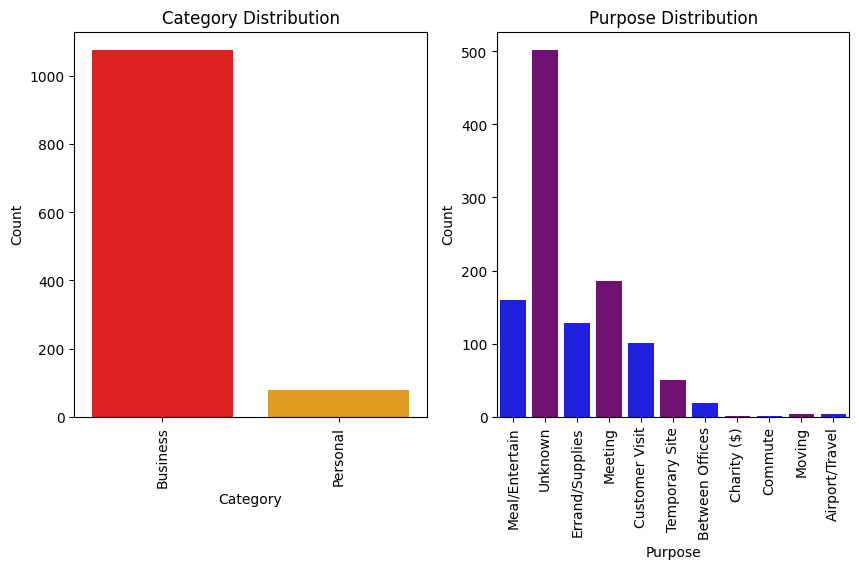

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='CATEGORY', data=df,palette=['red','orange'])
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

plt.subplot(1,2,2)
sns.countplot(x='PURPOSE', data=df,palette=['blue','purple'])
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Purpose Distribution')

plt.show()


<ipython-input-23-aba3baae5b9c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day-night'],palette=['red','yellow','green','blue'])


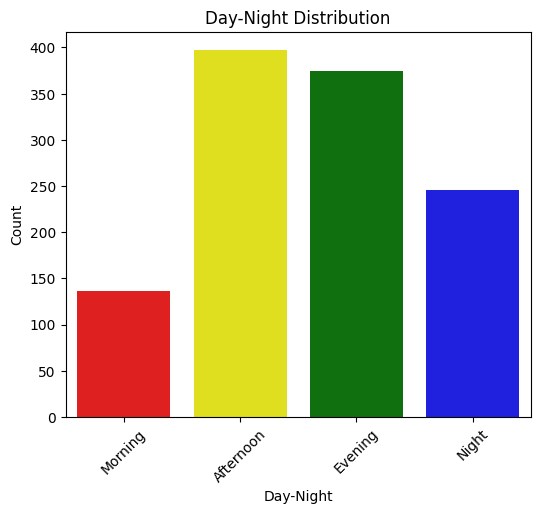

In [ ]:
plt.figure(figsize=(6,5))

sns.countplot(x=df['day-night'],palette=['red','yellow','green','blue'])
plt.xticks(rotation=45)
plt.xlabel('Day-Night')
plt.ylabel('Count')
plt.title('Day-Night Distribution')
plt.show()

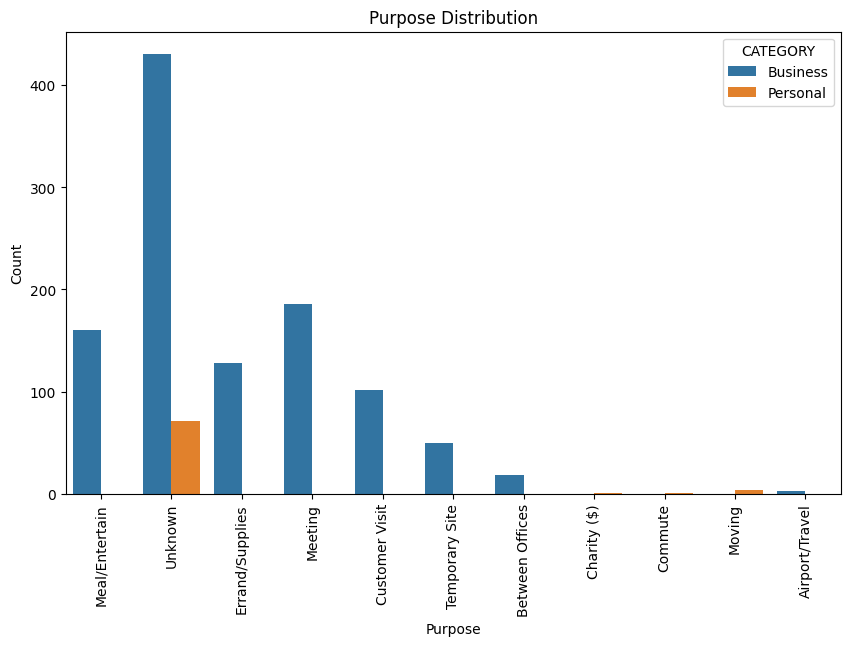

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='PURPOSE',hue='CATEGORY',data=df)
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Purpose Distribution')
plt.show()

# Insights from the above count-plots :
* Most of the rides are booked for business purpose.
* Most of the people book cabs for Meetings and Meal / Entertain purpose.
* Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).


In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,hours,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,21.183333,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,01:25:00,1.416667,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,20.416667,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,17.516667,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,14.700000,Afternoon


# Visualizing the month data

# Month total rides count vs Month ride max count

In [ ]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
month_label = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['MONTHS'] = df['MONTH'].map(month_label)

mon = df.MONTH.value_counts(sort=False)

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,hours,day-night,MONTH,MONTHS
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,21.183333,Night,1,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,01:25:00,1.416667,Morning,1,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,20.416667,Night,1,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,17.516667,Evening,1,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,14.700000,Afternoon,1,Jan


In [ ]:
monthdf = pd.DataFrame({"MONTHS": mon.values, "VALUE COUNT": df.groupby('MONTH',sort= False)['MILES'].max()})

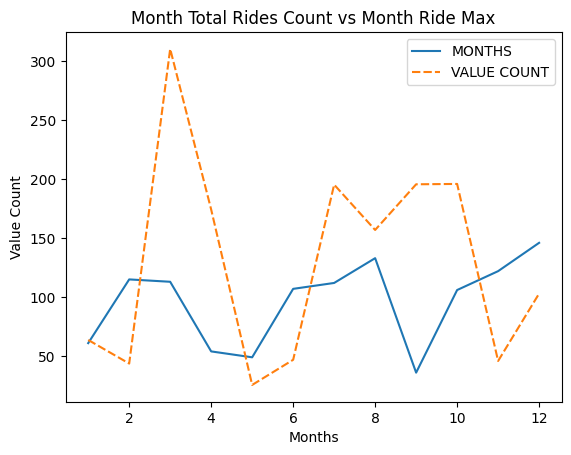

In [ ]:
p = sns.lineplot(data=monthdf)
p.set(xlabel='Months', ylabel='Value Count')
plt.title('Month Total Rides Count vs Month Ride Max')
plt.show()

# Insights from the above plot :
* The counts are very irregular.
* Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,hours,day-night,MONTH,MONTHS
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,21.183333,Night,1,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,01:25:00,1.416667,Morning,1,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,20.416667,Night,1,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,17.516667,Evening,1,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,14.700000,Afternoon,1,Jan


# Visualization for days data.

In [ ]:
df['DAY'] = df.START_DATE.dt.weekday
day_label = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['DAY'] = df['DAY'].map(day_label)
day_label = df.DAY.value_counts()

<ipython-input-71-6f9f3991262c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = day_label.index,y = day_label,palette=['red','orange','yellow','green','blue','purple','pink'])


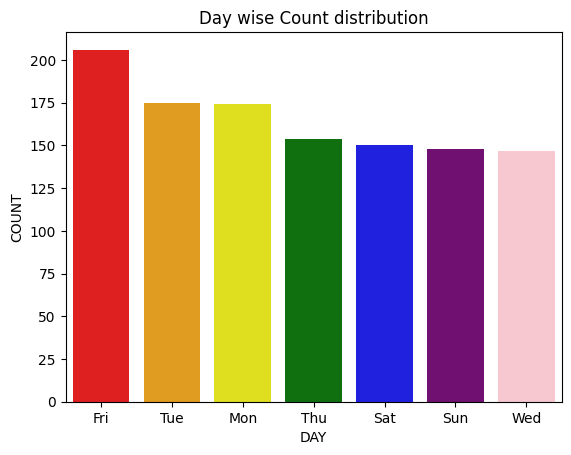

In [ ]:
sns.barplot(x = day_label.index,y = day_label,palette=['red','orange','yellow','green','blue','purple','pink'])
plt.ylabel('COUNT')
plt.title('Day wise Count distribution')
plt.show()

<ipython-input-65-036d001a32c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

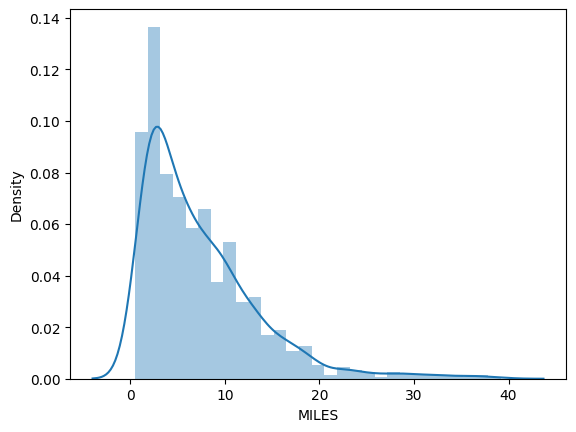

In [ ]:
sns.distplot(df[df['MILES']<40]['MILES'])

#Insights from the above plots :
* Most of the cabs booked for the distance of 4-5 miles.
* Majorly people chooses cabs for the distance of 0-20 miles.
*
For distance more than 20 miles cab counts is nearly negligible

# THANK YOU :)
